In [1]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('cmu_paper')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# VMPacking-v0

In [2]:
def extract_plot_stats(path):
    window = 100
    ep_stats = ['hist_stats/episode_reward']
    train_data = pd.read_csv(path + '/progress.csv')
    for i in ep_stats:
        vals = None
        ep_vals = train_data[i].values
        for j in ep_vals:
            ep_vals = np.array(re.findall(r"[-+]?\d*\.\d+|\d+", j)).astype(float)
            if vals is None:
                vals = ep_vals.copy()
            else:
                vals = np.hstack([vals, ep_vals.copy()])

    reward_var = np.array([np.std(vals[i-window:i+1]) 
                           if i>window else np.std(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    med_reward = np.array([np.median(vals[i-window:i+1]) 
                           if i>window else np.median(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    ep_max = np.array([np.max(vals[i-window:i+1]) 
                           if i>window else np.max(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    ep_min = np.array([np.min(vals[i-window:i+1]) 
                           if i>window else np.min(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    mean_vals = np.array([np.mean(vals[i-window:i+1]) 
                           if i>window else np.mean(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    if np.max(mean_vals) > 0:
        fill_max = np.where(mean_vals + reward_var<=ep_max, mean_vals+reward_var, ep_max)
        fill_min = np.where(mean_vals - reward_var>0, mean_vals-reward_var, 0)
    else:
        fill_max = np.where(mean_vals + reward_var<=0, mean_vals+reward_var, ep_max)
        fill_min = np.where(mean_vals - reward_var>ep_min, mean_vals-reward_var, ep_min)
        
    data_dict = {'mean_rewards': mean_vals, 
                 'med_rewards': med_reward,
                 'std_rewards': reward_var,
                 'ep_min': ep_min, 
                 'ep_max': ep_max, 
                 'fill_max': fill_max, 
                 'fill_min': fill_min}
    return pd.DataFrame(data_dict)

In [3]:
vm_mask = extract_plot_stats('/home/christian/ray_results/A3C/A3C_VMPacking-v0_079ae2cc_0_entropy_coeff=0.001,lr=1e-05_2020-04-22_21-35-00_4c5yoe7')
vm_no_mask = extract_plot_stats('/home/christian/ray_results/A3C/A3C_VMPacking-v0_0_2020-05-18_11-55-03k5isvwkv')

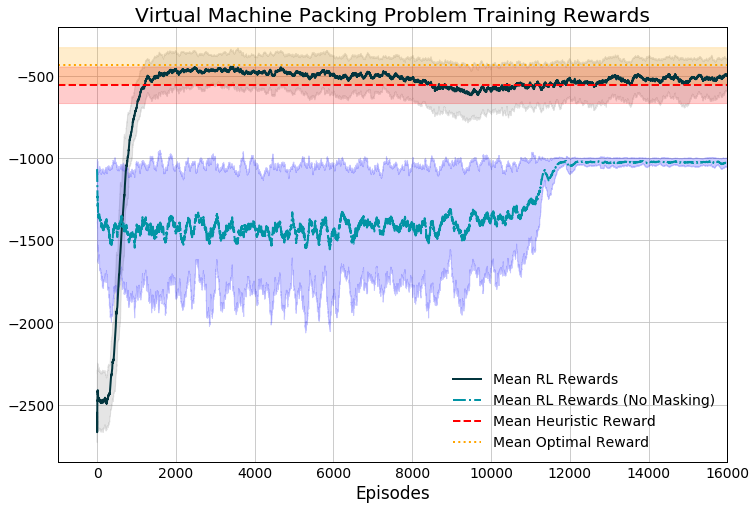

In [13]:
# Get episode totals
x_min = -1000
x_max = 16000
opt_mean = -438.8
opt_var = 111
heur_mean = -556.2
heur_var = 111.2

linestyles = ['--', '-.', ':', '-']

plt.figure(figsize=(12,8))
plt.plot(vm_mask['mean_rewards'], label='Mean RL Rewards')
plt.fill_between(np.arange(vm_mask.shape[0]), vm_mask['fill_min'], vm_mask['fill_max'],
                 color='gray', alpha=0.2)

plt.plot(vm_no_mask['mean_rewards'], label='Mean RL Rewards (No Masking)', color=colors[1],
         linestyle=linestyles[1])
plt.fill_between(np.arange(vm_no_mask.shape[0]), vm_no_mask['fill_min'], vm_no_mask['fill_max'],
                 color='blue', alpha=0.2)

plt.axhline(xmin=0, xmax=x_max, y=heur_mean, 
            color='r', linestyle=linestyles[0],
            label='Mean Heuristic Reward')
plt.fill_between(np.arange(x_min, x_max), heur_mean-heur_var, 
                 heur_mean+heur_var, color='r', alpha=0.2)

plt.axhline(xmin=0, xmax=x_max, y=opt_mean, 
            color='orange', linestyle=linestyles[2],
            label='Mean Optimal Reward')
plt.fill_between(np.arange(x_min, x_max), opt_mean-opt_var, 
                 opt_mean+opt_var, color='orange', alpha=0.2)

plt.title('Virtual Machine Packing Problem Training Rewards')
# plt.legend(bbox_to_anchor=[1.05, 0.75])
plt.legend()
plt.xlabel('Episodes')
plt.xlim([x_min, x_max])
plt.show()

In [41]:
vm_no_mask.iloc[-1]['mean_rewards'] / opt_mean

2.3717227453806453

In [42]:
vm_no_mask.iloc[-1]

mean_rewards   -1040.711941
med_rewards    -1039.950578
std_rewards       17.482780
ep_min         -1095.474455
ep_max         -1008.238307
fill_max       -1023.229160
fill_min       -1058.194721
Name: 215284, dtype: float64

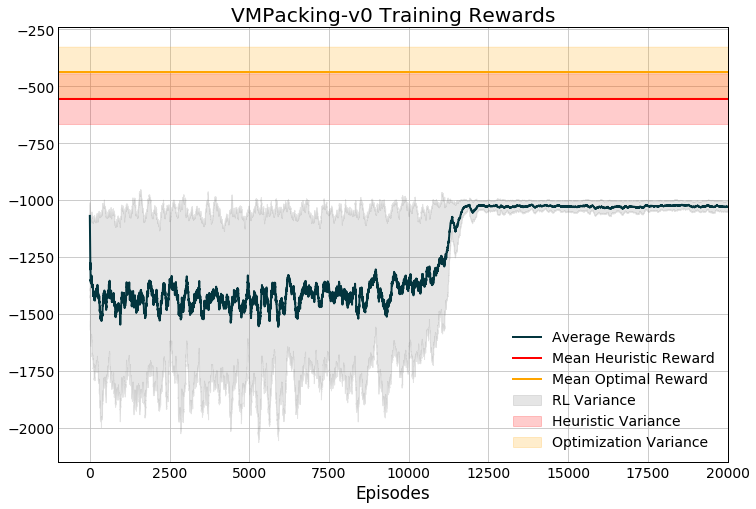

In [22]:
mask_train_data = pd.read_csv(path + '/progress.csv')
no_mask_train_data = pd.read_csv()

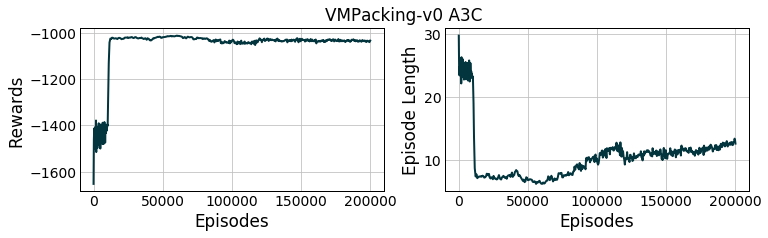

/home/christian/ray_results/A3C/A3C_VMPacking-v0_0_2020-05-18_12-55-23m83d1er9


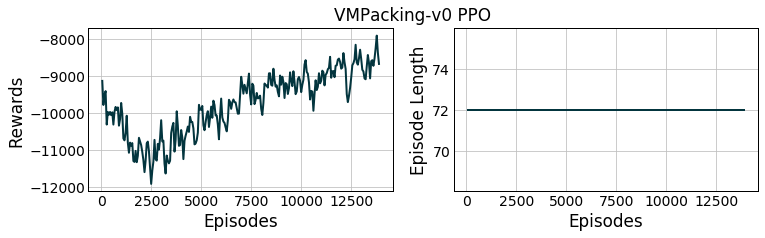

/home/christian/ray_results/PPO/PPO_VMPacking-v0_e96e1af0_0_entropy_coeff=0.01,lambda=1,lr=1e-05,vf_share_layers=False_2020-04-16_20-58-20sjlbj8xx


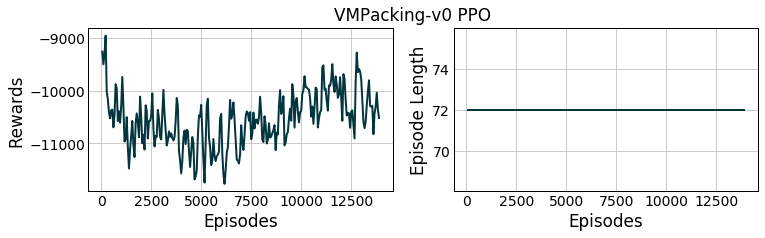

/home/christian/ray_results/PPO/PPO_VMPacking-v0_e96e1af1_1_entropy_coeff=0.001,lambda=1,lr=1e-05,vf_share_layers=False_2020-04-16_20-58-20ypi8kcqs


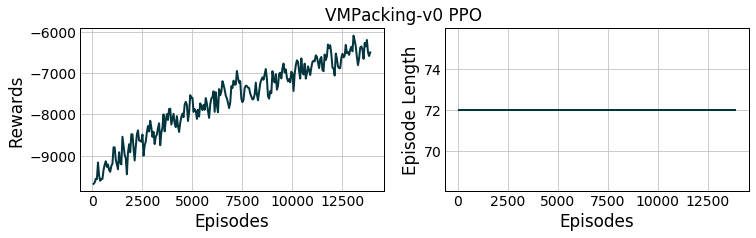

/home/christian/ray_results/PPO/PPO_VMPacking-v0_e96e1af2_2_entropy_coeff=0.01,lambda=0.5,lr=1e-05,vf_share_layers=False_2020-04-16_20-58-20xz1cv7gh


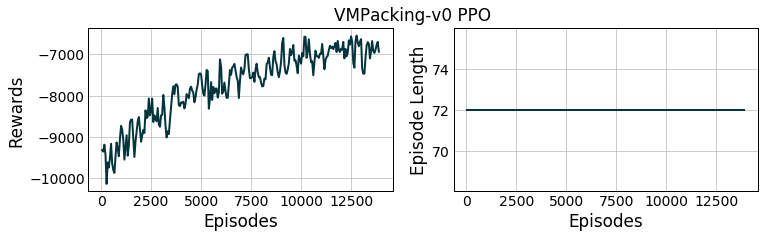

/home/christian/ray_results/PPO/PPO_VMPacking-v0_e96e1af3_3_entropy_coeff=0.001,lambda=0.5,lr=1e-05,vf_share_layers=False_2020-04-16_21-23-07klu0n5g_


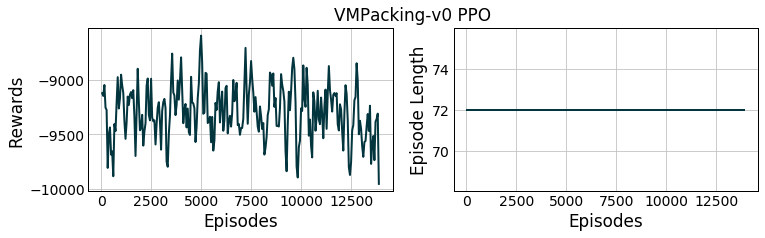

/home/christian/ray_results/PPO/PPO_VMPacking-v0_e96e1af4_4_entropy_coeff=0.01,lambda=1,lr=1e-06,vf_share_layers=False_2020-04-16_21-23-071b78_srs


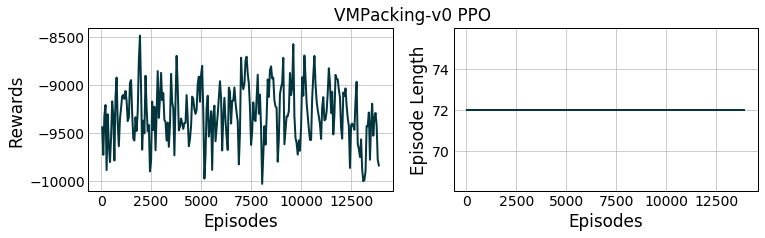

/home/christian/ray_results/PPO/PPO_VMPacking-v0_e96e1af5_5_entropy_coeff=0.001,lambda=1,lr=1e-06,vf_share_layers=False_2020-04-16_21-48-59_vtbq4pw


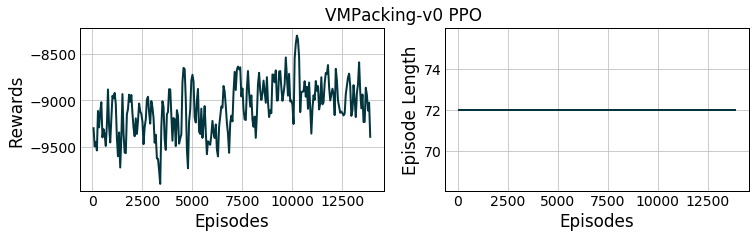

/home/christian/ray_results/PPO/PPO_VMPacking-v0_e96e1af6_6_entropy_coeff=0.01,lambda=0.5,lr=1e-06,vf_share_layers=False_2020-04-16_21-48-59gb0iyckw


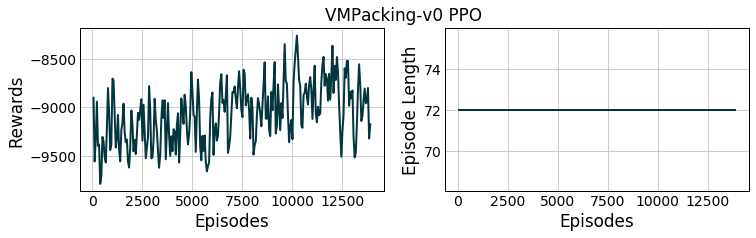

/home/christian/ray_results/PPO/PPO_VMPacking-v0_e96e1af7_7_entropy_coeff=0.001,lambda=0.5,lr=1e-06,vf_share_layers=False_2020-04-16_22-14-26br4q6yoq


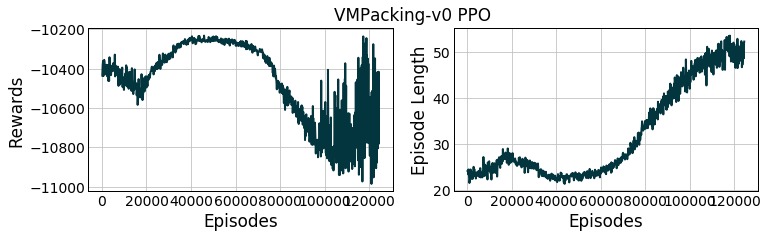

/home/christian/ray_results/PPO/PPO_VMPacking-v0_f72de250_0_entropy_coeff=0.001,lambda=0.95,lr=1e-05,vf_share_layers=False_2020-04-19_13-31-20fchg1ajz


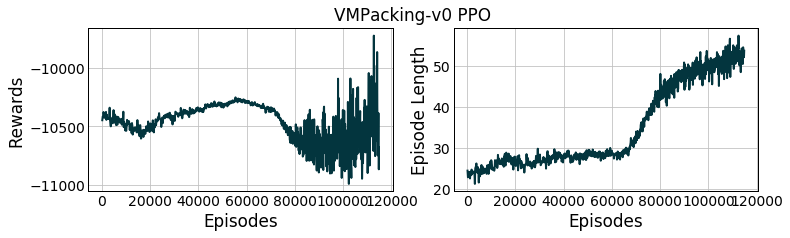

/home/christian/ray_results/PPO/PPO_VMPacking-v0_f72de251_1_entropy_coeff=0.001,lambda=0.9,lr=1e-05,vf_share_layers=False_2020-04-19_13-31-20iq8w7s40


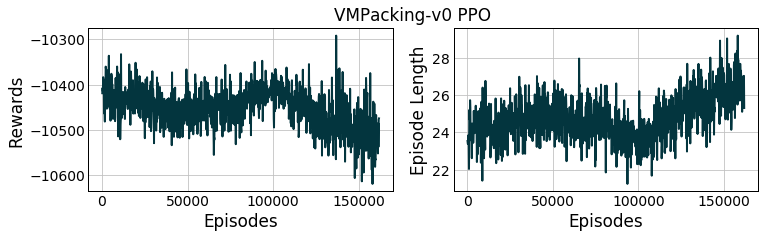

/home/christian/ray_results/PPO/PPO_VMPacking-v0_f72de252_2_entropy_coeff=0.001,lambda=0.95,lr=1e-06,vf_share_layers=False_2020-04-19_13-31-21f9j997te


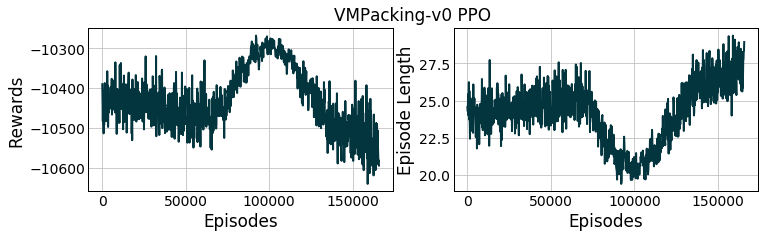

/home/christian/ray_results/PPO/PPO_VMPacking-v0_f72de253_3_entropy_coeff=0.001,lambda=0.9,lr=1e-06,vf_share_layers=False_2020-04-19_15-34-10zqhjnsh2


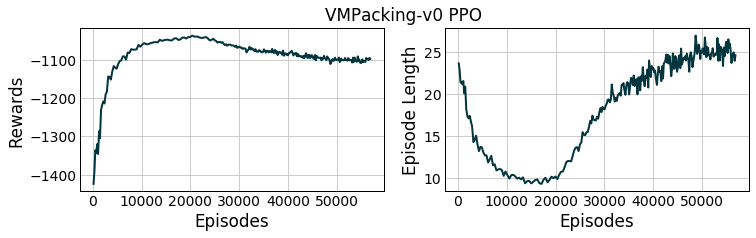

/home/christian/ray_results/PPO/PPO_VMPacking-v0_b86de7ee_0_entropy_coeff=0.01,lr=0.0001,vf_share_layers=False_2020-04-13_20-24-43olvo318z


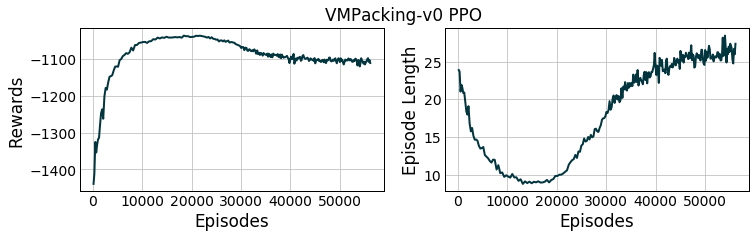

/home/christian/ray_results/PPO/PPO_VMPacking-v0_b86de7ef_1_entropy_coeff=0.001,lr=0.0001,vf_share_layers=False_2020-04-13_20-24-43x1l7yp3h


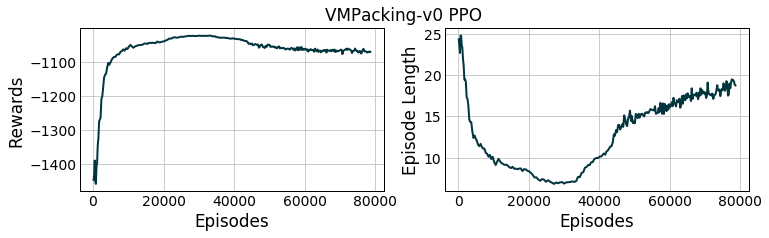

/home/christian/ray_results/PPO/PPO_VMPacking-v0_b86de7f0_2_entropy_coeff=0.01,lr=1e-05,vf_share_layers=False_2020-04-13_20-56-21wr9c9bs1


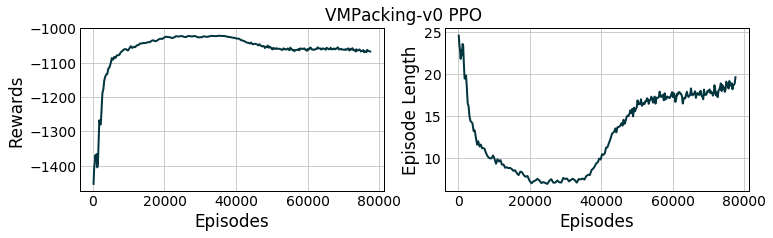

/home/christian/ray_results/PPO/PPO_VMPacking-v0_b86de7f1_3_entropy_coeff=0.001,lr=1e-05,vf_share_layers=False_2020-04-13_20-56-379cb614q8


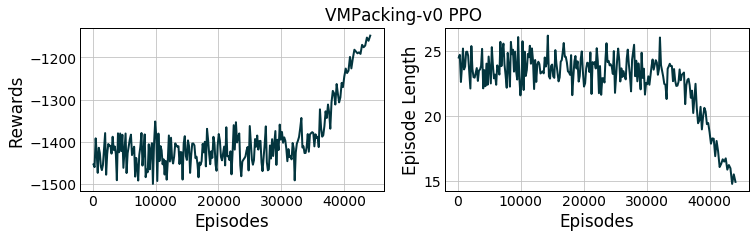

/home/christian/ray_results/PPO/PPO_VMPacking-v0_b86de7f2_4_entropy_coeff=0.01,lr=1e-06,vf_share_layers=False_2020-04-13_21-27-48d9usoa89


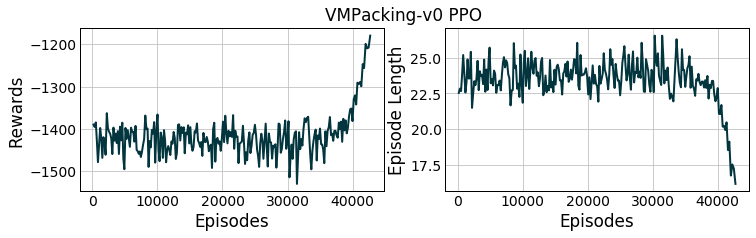

/home/christian/ray_results/PPO/PPO_VMPacking-v0_b86de7f3_5_entropy_coeff=0.001,lr=1e-06,vf_share_layers=False_2020-04-13_21-27-58b4s_71hq


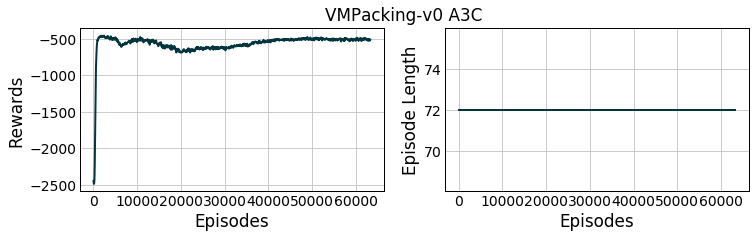

/home/christian/ray_results/A3C/A3C_VMPacking-v0_079ae2cc_0_entropy_coeff=0.001,lr=1e-05_2020-04-22_21-35-00_4c5yoe7


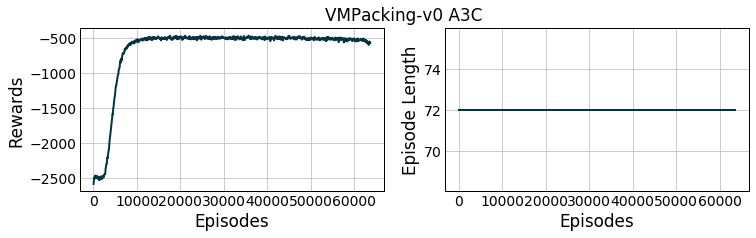

/home/christian/ray_results/A3C/A3C_VMPacking-v0_079ae2cd_1_entropy_coeff=0.001,lr=1e-06_2020-04-22_21-35-00pyjo7d1w


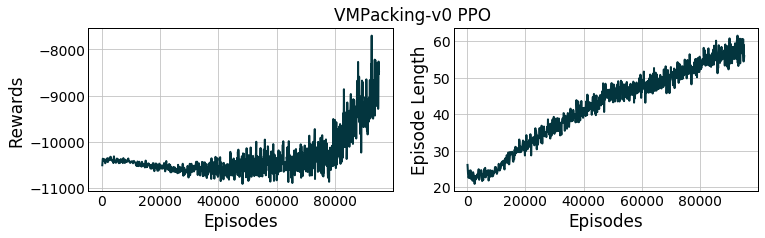

/home/christian/ray_results/PPO/PPO_VMPacking-v0_95614704_0_entropy_coeff=0.001,lambda=0.95,lr=1e-05,vf_share_layers=False_2020-04-21_20-35-44cufpyhn3


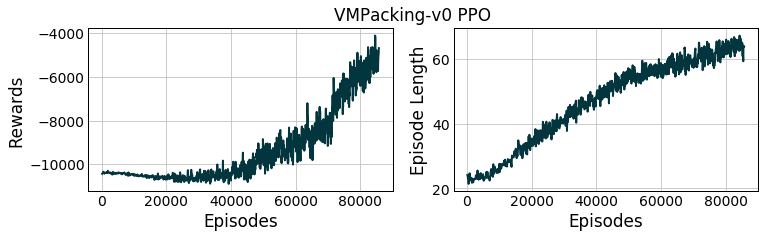

/home/christian/ray_results/PPO/PPO_VMPacking-v0_95614705_1_entropy_coeff=0.001,lambda=0.9,lr=1e-05,vf_share_layers=False_2020-04-21_20-35-442xl8lr45


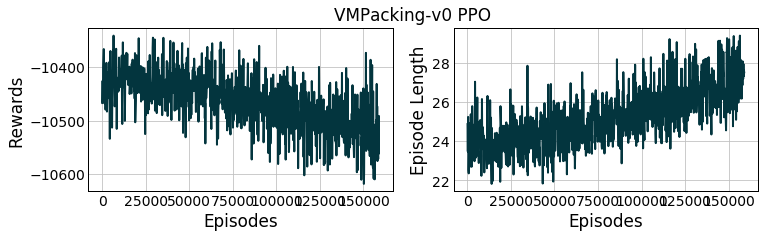

/home/christian/ray_results/PPO/PPO_VMPacking-v0_95614706_2_entropy_coeff=0.001,lambda=0.95,lr=1e-06,vf_share_layers=False_2020-04-21_20-35-44n42rnb7n


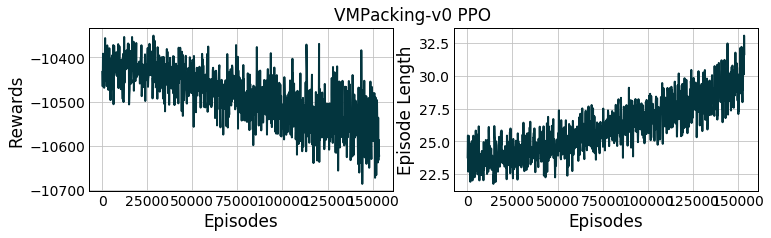

/home/christian/ray_results/PPO/PPO_VMPacking-v0_95614707_3_entropy_coeff=0.001,lambda=0.9,lr=1e-06,vf_share_layers=False_2020-04-21_22-28-31fsgjeosx


In [51]:
result_path = '../or_gym/benchmarks/results'
results = os.listdir(result_path)
envs = set([i.split('_')[0] for i in results])
envs = ['VMPacking-v0']
for env in envs:
    result_data = pd.DataFrame()
    for data_path in results:
        if env in data_path:
            _result_data = pd.read_csv(
                os.path.join(result_path, data_path))
            result_data = pd.concat([result_data, _result_data])
            
    for _path in result_data['logdir']:
        algo_name = os.path.basename(_path).split('_')[0]
        train_data = pd.read_csv(_path + '/progress.csv')
        fig, ax = plt.subplots(1, 2, figsize=(12, 3))
        ax[0].plot(train_data['episodes_total'], train_data['episode_reward_mean'])
        ax[0].set_xlabel('Episodes')
        ax[0].set_ylabel('Rewards')
#         ax[0].set_title(env + ' ' + algo_name)
        
        ax[1].plot(train_data['episodes_total'], train_data['episode_len_mean'])
        ax[1].set_xlabel('Episodes')
        ax[1].set_ylabel('Episode Length')
        plt.suptitle(env + ' ' + algo_name)
#         plt.tight_layout()
        plt.show()
        print(_path)

In [43]:
mask_data = pd.read_csv('/home/christian/ray_results/A3C/A3C_VMPacking-v0_079ae2cc_0_entropy_coeff=0.001,lr=1e-05_2020-04-22_21-35-00_4c5yoe7/progress.csv')
no_mask_data = pd.read_csv('/home/christian/ray_results/A3C/A3C_VMPacking-v0_0_2020-05-18_11-55-03k5isvwkv/progress.csv')

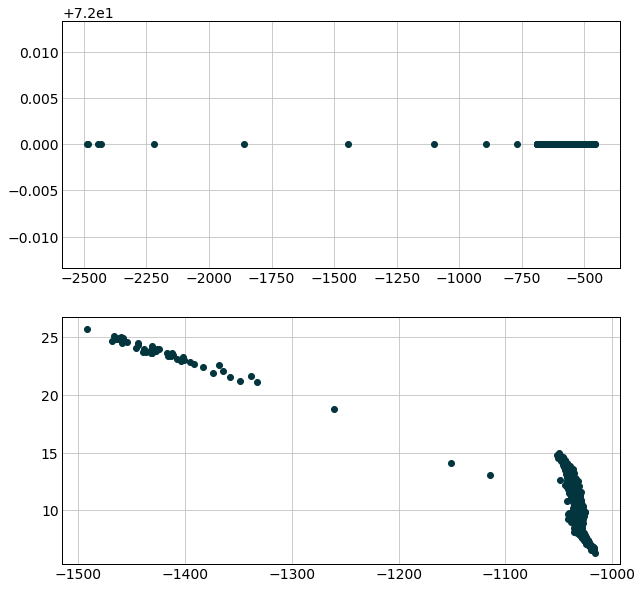

In [50]:
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].scatter(mask_data['episode_reward_mean'], mask_data['episode_len_mean'])
ax[1].scatter(no_mask_data['episode_reward_mean'], no_mask_data['episode_len_mean'])
# ax[1].set_xlabel('Episodes')
# ax[1].set_ylabel('Episode Length')

plt.show()

In [46]:
no_mask_data.shape

(500, 43)

In [47]:
mask_data['timesteps_total']

(1000, 43)

-438.8